In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
hr = pd.read_csv("hr_sample.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.44,0.66,6,134,8,0,0,RandD,high,0
1,0.81,0.92,5,258,3,0,1,sales,medium,0
2,0.50,0.81,3,148,2,0,0,sales,low,0
3,0.64,0.60,3,135,3,0,0,RandD,low,0
4,0.59,0.47,5,191,3,0,0,RandD,low,0


In [3]:
hr.shape

(7101, 10)

In [4]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [6]:
# Check info
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     7101 non-null   float64
 1   last_evaluation        7101 non-null   float64
 2   number_project         7101 non-null   int64  
 3   average_montly_hours   7101 non-null   int64  
 4   time_spend_company     7101 non-null   int64  
 5   Work_accident          7101 non-null   int64  
 6   promotion_last_5years  7101 non-null   int64  
 7   Department             7101 non-null   object 
 8   salary                 7101 non-null   object 
 9   left                   7101 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 554.9+ KB


In [7]:
# Check target column
hr['left'].value_counts(normalize=True)

0    0.502887
1    0.497113
Name: left, dtype: float64

In [8]:
hr['satisfaction_level'].describe()

count    7101.000000
mean        0.550715
std         0.266348
min         0.090000
25%         0.380000
50%         0.550000
75%         0.780000
max         1.000000
Name: satisfaction_level, dtype: float64

In [10]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,7101.0,0.550715,0.266348,0.09,0.38,0.55,0.78,1.0
last_evaluation,7101.0,0.716774,0.180693,0.36,0.54,0.73,0.88,1.0
number_project,7101.0,3.826081,1.461825,2.00,2.00,4.00,5.00,7.0
average_montly_hours,7101.0,203.545839,54.204280,96.00,152.00,205.00,253.00,310.0
time_spend_company,7101.0,3.633432,1.310350,2.00,3.00,3.00,4.00,10.0
Work_accident,7101.0,0.110548,0.313593,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,7101.0,0.015209,0.122392,0.00,0.00,0.00,0.00,1.0
left,7101.0,0.497113,0.500027,0.00,0.00,0.00,1.00,1.0


In [11]:
hr['number_project'].value_counts()

2    1805
4    1641
3    1307
5    1269
6     824
7     255
Name: number_project, dtype: int64

In [12]:
hr['Work_accident'].value_counts()

0    6316
1     785
Name: Work_accident, dtype: int64

In [13]:
hr['promotion_last_5years'].value_counts()

0    6993
1     108
Name: promotion_last_5years, dtype: int64

In [14]:
hr['salary'].value_counts()

low       3704
medium    2991
high       406
Name: salary, dtype: int64

In [15]:
hr['Department'].value_counts()

sales          2015
technical      1319
support        1071
IT              567
product_mng     423
marketing       398
accounting      370
hr              351
RandD           333
management      254
Name: Department, dtype: int64

In [ ]:
# One hot encoding for department and salary

In [16]:
df = hr.copy()

In [17]:
df = pd.get_dummies(hr,drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.44,0.66,6,134,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.81,0.92,5,258,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.50,0.81,3,148,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.64,0.60,3,135,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.59,0.47,5,191,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [18]:
train = df.sample(frac=0.75,random_state=1)
test = df.drop(train.index)

In [19]:
from sklearn.model_selection import train_test_split
# train,test = train_test_split(df,test_size=0.25)

In [20]:
print(train.shape)
print(test.shape)

(5326, 19)
(1775, 19)


In [23]:
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
420,0.74,0.84,3,239,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5914,0.41,0.56,2,143,3,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1206,0.65,0.77,4,205,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5370,0.38,0.50,2,145,3,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2721,0.96,0.55,3,164,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [21]:
train['left'].value_counts(normalize=True)

0    0.501314
1    0.498686
Name: left, dtype: float64

In [22]:
test['left'].value_counts(normalize=True)

0    0.507606
1    0.492394
Name: left, dtype: float64

In [25]:
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'left', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [24]:
import statsmodels.formula.api as smf

In [27]:
glm1 = smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+Department_RandD+Department_accounting+Department_hr+Department_management+Department_marketing+Department_product_mng+Department_sales+Department_support+Department_technical+salary_low+salary_medium',data=train,family=sm.families.Binomial()).fit()

In [28]:
glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                 5326
Model:                            GLM   Df Residuals:                     5307
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.4
Date:                Fri, 18 Feb 2022   Deviance:                       5528.7
Time:                        11:34:39   Pearson chi2:                 6.39e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0380      0.261     -3.979      0.000      -1.549      -0.527
satisfaction_level        -4.3948      0.154    -28.525      0.000      -4.697      -4.093
last_evaluation            1.3778      0.249      5.525      0.000       0.889       1.867
number_project            -0.4373      0.035    -12.515      0.000      -0.506      -0.369
average_montly_hours       0.0046      0.001      5.251      0.000       0.003       0.006
time_spend_company         0.4506      0.029     15.434      0.000       0.393       0.508
Work_accident             -1.5759      0.125    -12.636      0.000      -1.820      -1.332
promotion_last_5years     -1.8654      0.371     -5.023      0.000      -2.593      -1.138
Department_RandD          -0.4970      0.197     -2.527      0.012      -0.882      -0.112
Department_accounting      0.2498      0.185      1.353      0.176      -0.112       0.612
Department_hr              0.5011      0.185      2.707      0.007       0.138       0.864
Department_management     -0.5148      0.212     -2.429      0.015      -0.930      -0.099
Department_marketing       0.2058      0.186      1.107      0.268      -0.158       0.570
Department_product_mng     0.0097      0.175      0.056      0.956      -0.333       0.352
Department_sales           0.0700      0.131      0.533      0.594      -0.187       0.327
Department_support         0.2236      0.143      1.561      0.119      -0.057       0.504
Department_technical       0.2230      0.139      1.610      0.107      -0.049       0.494
salary_low                 1.9416      0.184     10.546      0.000       1.581       2.302
salary_medium              1.3347      0.185      7.232      0.000       0.973       1.696
==========================================================================================
"""

In [33]:
glm2 = smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+Department_RandD+Department_hr+Department_management+salary_low+salary_medium',data=train,family=sm.families.Binomial()).fit()

In [34]:
glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                 5326
Model:                            GLM   Df Residuals:                     5313
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.7
Date:                Fri, 18 Feb 2022   Deviance:                       5535.4
Time:                        12:06:20   Pearson chi2:                 6.40e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.8954      0.235     -3.804      0.000      -1.357      -0.434
satisfaction_level       -4.3997      0.154    -28.607      0.000      -4.701      -4.098
last_evaluation           1.3903      0.249      5.584      0.000       0.902       1.878
number_project           -0.4378      0.035    -12.561      0.000      -0.506      -0.369
average_montly_hours      0.0046      0.001      5.285      0.000       0.003       0.006
time_spend_company        0.4489      0.029     15.406      0.000       0.392       0.506
Work_accident            -1.5682      0.124    -12.599      0.000      -1.812      -1.324
promotion_last_5years    -1.8481      0.369     -5.010      0.000      -2.571      -1.125
Department_RandD         -0.6357      0.163     -3.905      0.000      -0.955      -0.317
Department_hr             0.3619      0.149      2.436      0.015       0.071       0.653
Department_management    -0.6539      0.181     -3.617      0.000      -1.008      -0.300
salary_low                1.9305      0.184     10.492      0.000       1.570       2.291
salary_medium             1.3316      0.185      7.212      0.000       0.970       1.694
=========================================================================================
"""

In [35]:
test['prob'] = glm2.predict(test)
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,prob
0,0.44,0.66,6,134,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.276188
2,0.50,0.81,3,148,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.557839
14,0.52,0.80,5,209,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.386498
15,0.23,0.99,5,176,4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.563269
18,0.69,0.90,6,224,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0.046300


In [36]:
pred_y =test['prob'].map(lambda x: 1 if x>=0.5 else 0)
test['y_pred'] = pred_y
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_RandD,Department_accounting,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,prob,y_pred
0,0.44,0.66,6,134,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.276188,0
2,0.50,0.81,3,148,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.557839,1
14,0.52,0.80,5,209,2,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.386498,0
15,0.23,0.99,5,176,4,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0.563269,1
18,0.69,0.90,6,224,4,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0.046300,0


In [38]:
# Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.44,0.66,6,134,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.81,0.92,5,258,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.50,0.81,3,148,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.64,0.60,3,135,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.59,0.47,5,191,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
y = df['left'] # target variable
x = df.drop('left',axis=1) # all independent variables

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10,stratify=y)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5325, 18)
(1776, 18)
(5325,)
(1776,)


In [68]:
y_train.value_counts(normalize=True)

0    0.502911
1    0.497089
Name: left, dtype: float64

In [69]:
y_test.value_counts(normalize=True)

0    0.502815
1    0.497185
Name: left, dtype: float64

In [58]:
logreg = LogisticRegression(solver= 'liblinear')

In [59]:
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [60]:
ypred  = logreg.predict(x_test) # Predicted values

In [61]:
ypred # Predicted values

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
y_test # Actual values

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_scorei   

In [77]:
confusion_matrix(y_test,ypred)

array([[657, 236],
       [168, 715]], dtype=int64)

In [82]:
test1 = pd.DataFrame(y_test)
test1['pred'] = ypred
test1

,left,pred
5285,1,1
5041,1,0
4040,1,1
1888,0,1
2729,0,1
...,...,...
4476,1,0
4486,1,1
1270,0,0
1267,0,0


In [83]:
test1.query("left==0 & pred==0").shape[0]  # True Negative

657

In [84]:
test1.query("left==1 & pred==1").shape[0] # True Positive

715

In [85]:
test1.query("left==0 & pred==1").shape[0] # false positive

236

In [89]:
test1.query("left==1 & pred==0").shape[0] # false negative

168

In [90]:
accuracy_score(y_test,ypred)

0.7725225225225225

In [91]:
from sklearn.metrics import precision_score,recall_score

In [92]:
precision_score(y_test,ypred)

0.7518401682439537

In [93]:
recall_score(y_test,ypred)

0.8097395243488109

In [95]:
from sklearn.metrics import roc_curve,roc_auc_score

In [96]:
fpr,tpr,thresholds =  roc_curve(y_test,ypred)

Text(0, 0.5, 'True positive rate')

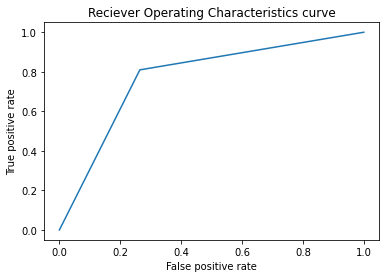

In [102]:
plt.plot(fpr,tpr)
#plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.title("Reciever Operating Characteristics curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [103]:
# ROC-AUC score
roc_auc_score(y_test,ypred)

0.7727309043916507

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [109]:
kf = KFold(n_splits=5)
scores = cross_val_score(logreg,x,y,cv=kf,scoring='accuracy')
scores.mean()

0.6453996887730322

In [120]:
# task 1
df = pd.read_csv("hrdata1.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeCount            1470 non-null   int64 
 1   EmployeeID               1470 non-null   int64 
 2   Department               1470 non-null   object
 3   JobRole                  1470 non-null   object
 4   Attrition                1470 non-null   object
 5   Gender                   1470 non-null   object
 6   Age                      1470 non-null   int64 
 7   MaritalStatus            1470 non-null   object
 8   Education                1470 non-null   object
 9   EducationField           1470 non-null   object
 10  BusinessTravel           1470 non-null   object
 11  JobInvolvement           1470 non-null   object
 12  JobLevel                 1470 non-null   int64 
 13  JobSatisfaction          1470 non-null   object
 14  Hourlyrate               1470 non-null  